# Simulateur

Ce notebook implémente une simulation de A à Z.

Le fichier .py correspondant est `suntox.py`. Ça vaut le coup de l'ouvrir pour voir les paramètres qu'il propose et leurs valeurs par défaut.

## setup

In [1]:
# To make sure that you run an up-to-date version of your package:
# always do "Kernel > Restart and Run All"
LOG="/tmp/log_install"
!(cd ..; pip install . > $LOG 2>&1 || (echo "ERROR: INSTALL FAILED ! "; cat $LOG); cd - > /dev/null;)
import suntox as ss

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

## paramétrage et exécution

In [3]:
BEACH_GEOJSON="../data/agde_sete__beach.json"
SEA_GEOJSON="../data/agde_sete__sea.json"
BATHIMETRY_TIF="../data/ROI_bathimetry.tif"
BOUNDS=(3.4515, 3.6882, 43.2278, 43.4004)

In [4]:
simu = ss.suntox.Simulateur(BEACH_GEOJSON, SEA_GEOJSON, BATHIMETRY_TIF, BOUNDS,
                            sim_step_minutes=60, rasters_resolution_m=100,
                            spread_speed_sigma_mph=200, max_people_per_m2=0.03,
                            start_date="01/04/2022", stop_date="31/10/2022",
                           )

loading ROI...
loading bathymetry...
KERNEL :
 - tgt speed 200, 1.0 h/step, 100 m/pix
 -> size 6*6, sigma 2.0


In [5]:
simu.run()

running simulation...


100%|███████████████████████████████████████████████████████████████████████████| 5112/5112 [01:43<00:00, 49.40it/s]


done, storing results...


## résultats de la simu

In [6]:
all_data = dict(np.load("/tmp/all.npz", allow_pickle=True))

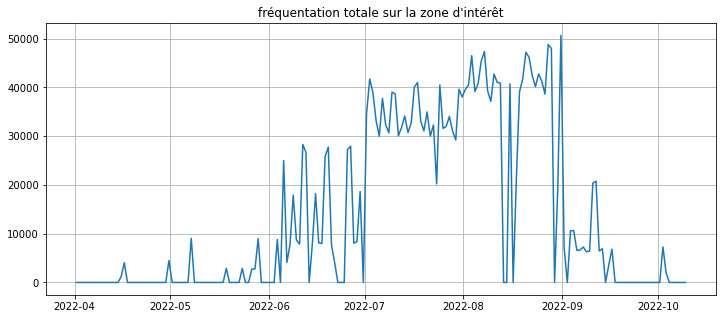

In [7]:
plt.figure(figsize=(12,5))
plt.plot(all_data["timestamps"], all_data['swimmers_count'])
plt.title("fréquentation totale sur la zone d'intérêt")
plt.grid()

In [8]:
d = all_data["rasters"]
d[d<all_data["vmin"]] = all_data["vmin"]

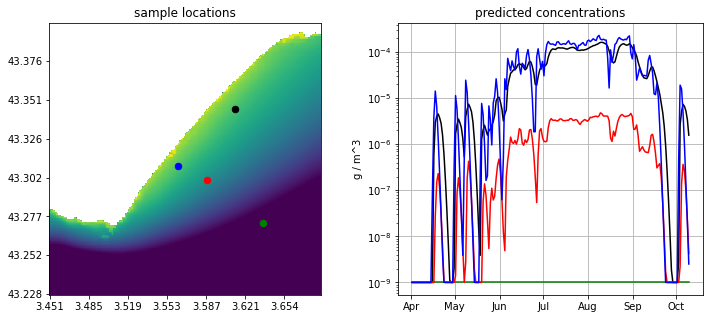

In [9]:
plt.figure(figsize=(12,5))
ax = plt.subplot(121)
plt.title("sample locations")
xticks = np.linspace(0, d.shape[0],8)
xlabels = [f"{a:.3f}" for a in np.linspace(BOUNDS[0],BOUNDS[1],8)]
yticks = np.linspace(0, d.shape[1],8)
ylabels = [f"{a:.3f}" for a in np.linspace(BOUNDS[2],BOUNDS[3],8)]
ax.set_xticks(xticks, xlabels)
ax.set_yticks(yticks, ylabels)

plt.imshow(np.log(d[124,:,:].T), origin="lower")
plt.plot(130,130, 'k.', markersize=13)
plt.plot(150,50, 'g.', markersize=13)
plt.plot(110,80, 'r.', markersize=13)
plt.plot(90,90, 'b.', markersize=13)

ax = plt.subplot(122)
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.semilogy(all_data["timestamps"], d[:,130,130], 'k')
plt.semilogy(all_data["timestamps"], d[:,150,50], 'g')
plt.semilogy(all_data["timestamps"], d[:,110,80], 'r')
plt.semilogy(all_data["timestamps"], d[:,80,80], 'b')
plt.title("predicted concentrations")
plt.ylabel("g / m^3")
plt.grid()

In [10]:
! cp /tmp/all.npz ~/work/oh7-qbook/data/all.npz

(192, 191, 191)